In [1]:
%matplotlib inline
import argparse
import csv
import logging
import os
import random
import sys
import pickle
import time
import numpy as np
from termcolor import colored
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from bert_util import *

In [2]:
sst_processor = Sst2Processor()
train_examples = sst_processor.get_train_examples('data/', 10000)
test_examples = sst_processor.get_dev_examples('data/')

In [3]:
interested_test_idx = 7

for te in test_examples:
    if te.guid == interested_test_idx:
        print(te.guid)
        print(colored(te.text_a, "blue"), te.label)
        break

7
a sometimes tedious film .  0


In [4]:
test_tok_sal_list, train_tok_sal_lists, test_pred_status = pickle.load(open("from_aws/SA_influence_output_bert_e3/saliency_test_" + str(interested_test_idx) + ".pkl", "rb"))

In [5]:
top_sal_ix = [_ix for _ix, _ in sorted(enumerate(test_tok_sal_list), key=lambda x: -x[1][1])][:3]
for ix, (tok, sal) in enumerate(test_tok_sal_list):
    if ix in top_sal_ix:
        print(colored(tok + '\t' + str(sal), "green"))
    else:
        print(tok + '\t' + str(sal))

[CLS]	0.015014335
a	0.07373888
sometimes	0.19994108
ted	-0.45029685
##ious	0.0042031133
film	-0.031940274
.	-0.015620316
[SEP]	0.20924518


In [6]:
orig_influences = pickle.load(open("from_aws/SA_influence_output_bert_e3/influences_test_" + str(interested_test_idx) + ".pkl", "rb"))

In [7]:
order_of_interest = "max"
label_of_interest = "both"
num_of_interest = 10

train_idx_sorted = list(np.argsort(orig_influences))
if order_of_interest == "max":
    train_idx_sorted.reverse()
if label_of_interest == "both":
    valid_labels = ["0", "1"]
else:
    valid_labels = [label_of_interest]

cnt = 0
for idx in train_idx_sorted:
    te = train_examples[idx]
    if te.label in valid_labels:
        print(colored(te.text_a, "blue"), te.label)
        print(orig_influences[idx])
#         top_sal_ix = [_ix for _ix, _ in sorted(enumerate(train_tok_sal_lists[idx]), key=lambda x: -x[1][1])][:3]
#         for ix, (tok, sal) in enumerate(train_tok_sal_lists[idx]):
#             if ix in top_sal_ix:
#                 print(colored(tok + '\t' + str(sal), "green"))
#             else:
#                 print(tok + '\t' + str(sal))
        print()
        cnt += 1
    if cnt >= num_of_interest:
        break

that is the recording industry in the current climate of mergers and downsizing  1
31.986400604248047

credulous  1
31.018287658691406

an admittedly middling film  1
30.333276748657227

a simplistic narrative and  1
28.808013916015625

of its lurid fiction  1
28.745344161987305

emphasising her plight and isolation  1
28.046144485473633

fresh-faced  1
26.88740348815918

the moral shrapnel and mental shellshock will linger long after this film has ended .  1
26.08786392211914

a wacky , screwball comedy  1
24.073925018310547

, uninhibited  1
23.764463424682617



In [8]:
diff_influences_list, mask_ix = pickle.load(open("from_aws/SA_influence_output_bert_e3/diff_mask_influences_test_" + str(interested_test_idx) + ".pkl", "rb"))

In [47]:
remove_token_type = 2

influences = diff_influences_list[remove_token_type]
print("masked token:", test_tok_sal_list[mask_ix[remove_token_type]][0])
print()

order_of_interest = "max"
label_of_interest = "both"
num_of_interest = 10

train_idx_sorted = list(np.argsort(influences))
if order_of_interest == "max":
    train_idx_sorted.reverse()
if label_of_interest == "both":
    valid_labels = ["0", "1"]
else:
    valid_labels = [label_of_interest]

cnt = 0
for idx in train_idx_sorted:
    te = train_examples[idx]
    if te.label in valid_labels:
        print(colored(te.text_a, "blue"), te.label)
        print(influences[idx])
        print()
        cnt += 1
    if cnt >= num_of_interest:
        break

masked token: sometimes

visually flashy but narratively opaque and  0
0.034249115735292435

far too clever by half , howard 's film is really a series of strung-together moments , with all the spaces in between filled with fantasies , daydreams , memories and one fantastic visual trope after another .  0
0.033796798437833786

tedious norwegian offering which somehow snagged an oscar nomination .  0
0.03196989372372627

law enforcement , and a visceral , nasty journey  0
0.0297705065459013

freaking out  0
0.02831873670220375

huge gap  0
0.027937954291701317

the film 's desire to be liked sometimes undermines the possibility for an exploration of the thornier aspects of the nature/nurture argument in regards to homosexuality .  0
0.026909133419394493

the whole affair , true story or not , feels incredibly hokey ...  0
0.025996092706918716

american and european cinema has amassed a vast holocaust literature , but it is impossible to think of any film more challenging or depressing t

In [162]:
tp = 0.001

idx_range = range(1, 51)
influence_distance_lists = ([], [], [], [], [])
for iti in idx_range:
    orig_inf = pickle.load(open("from_aws/SA_influence_output_bert_e3/influences_test_" + str(iti) + ".pkl", "rb"))
    diff_inf_list, m_ix = pickle.load(open("from_aws/SA_diff_influence_output_bert_e3/diff_mask_influences_test_" + str(iti) + ".pkl", "rb"))
    for i, influences in enumerate(diff_inf_list):
        influence_distance_lists[i].append(influence_distance(orig_inf, influences, top_percentage=tp))

In [163]:
np.mean(influence_distance_lists[0])

0.7559999999999999

In [164]:
np.mean(influence_distance_lists[1])

0.8420000000000002

In [165]:
np.mean(influence_distance_lists[2])

0.652

In [166]:
np.mean(influence_distance_lists[3])

0.8440000000000001

In [167]:
np.mean(influence_distance_lists[4])

0.79

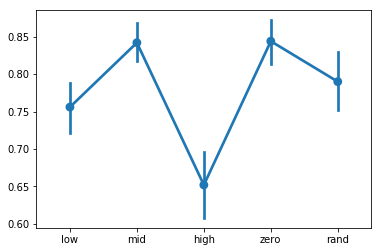

In [168]:
sns.pointplot(x=["low"]*len(idx_range)+["mid"]*len(idx_range)+["high"]*len(idx_range)+["zero"]*len(idx_range)+["rand"]*len(idx_range),
              y=influence_distance_lists[0]+influence_distance_lists[1]+influence_distance_lists[2]+influence_distance_lists[3]+influence_distance_lists[4], ci=68)